In [1]:
# import librs
# load dataset
# EDA
# visualization 
# split data
# x = all cols without income
# y = income 
# train_test_split(x , y , train_size = .7 , random_state = 42 )
# LinearRegression()
# fit(x_train , y_train )
# predict(x_test)
# (y_test , y_pred)

# Import librs

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

# Load Dataset 

In [3]:
df = pd.read_csv("teleCust1000t.csv")

# EDA

In [4]:
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [5]:
df.tail()

region  tenure  age  marital  address  income  ed  employ  retire  \
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  custcat  
995       1       3        1  
996       1       1        1  
997       1       1        4  
998       1       1        3  
999       1       3        2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [8]:
df.describe()

region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.000000     0.000000   
25%      29.000000     2.000000     3.000000     0.000000     0.000000   
50%      47.000000     3.000000     8.000000     0.000000     1.000000   
75%      83.000000     4.000000    17.000000     0.000000     1.000000   
max    1668.000000     5.000000    47.000000     1.000000     1.000000   

            reside      custcat  
count  1000.000000  1000.000000  
mean      2.331000     2.487000  
std       1.435793     1.120306  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     3.000000  
75%       3.000000     3.000000  
max       8.000000     4.000000

In [10]:
# check mission value
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [12]:
df2 = pd.DataFrame({"name":["A" , "B" , "C" , "C"] , 
              "age":[np.nan , 13,14,12] ,"grade":["EX" , "VG" , "G" , "VG"] })

In [13]:
df2

name   age grade
0    A   NaN    EX
1    B  13.0    VG
2    C  14.0     G
3    C  12.0    VG

In [18]:
df2["name"].unique()

array(['A', 'B', 'C'], dtype=object)

In [14]:
pd.get_dummies(df2 , columns=["name"])

age grade  name_A  name_B  name_C
0   NaN    EX       1       0       0
1  13.0    VG       0       1       0
2  14.0     G       0       0       1
3  12.0    VG       0       0       1

In [15]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder

In [20]:
le = LabelEncoder()

In [23]:
le.fit(df2["name"])

LabelEncoder()

In [24]:
le.transform(df2["name"])

array([0, 1, 2, 2])

In [25]:
df2

name   age grade
0    A   NaN    EX
1    B  13.0    VG
2    C  14.0     G
3    C  12.0    VG

In [26]:
ohe = OneHotEncoder()

In [28]:
ohe.fit(df2[["name"]])

OneHotEncoder()

In [34]:
ohe.transform(df2[["name"]]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [32]:
type(df2[["name"]])

pandas.core.frame.DataFrame

In [31]:
type(df2["name"])

pandas.core.series.Series

In [35]:
df2.isnull().sum()

name     0
age      1
grade    0
dtype: int64

In [36]:
df2["age"]

0     NaN
1    13.0
2    14.0
3    12.0
Name: age, dtype: float64

In [37]:
df2["age"].fillna(method='ffill')

0     NaN
1    13.0
2    14.0
3    12.0
Name: age, dtype: float64

In [38]:
df2["age"].fillna(method='bfill')

0    13.0
1    13.0
2    14.0
3    12.0
Name: age, dtype: float64

In [39]:
df2["age"].fillna(df2["age"].mean())

0    13.0
1    13.0
2    14.0
3    12.0
Name: age, dtype: float64

In [40]:
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

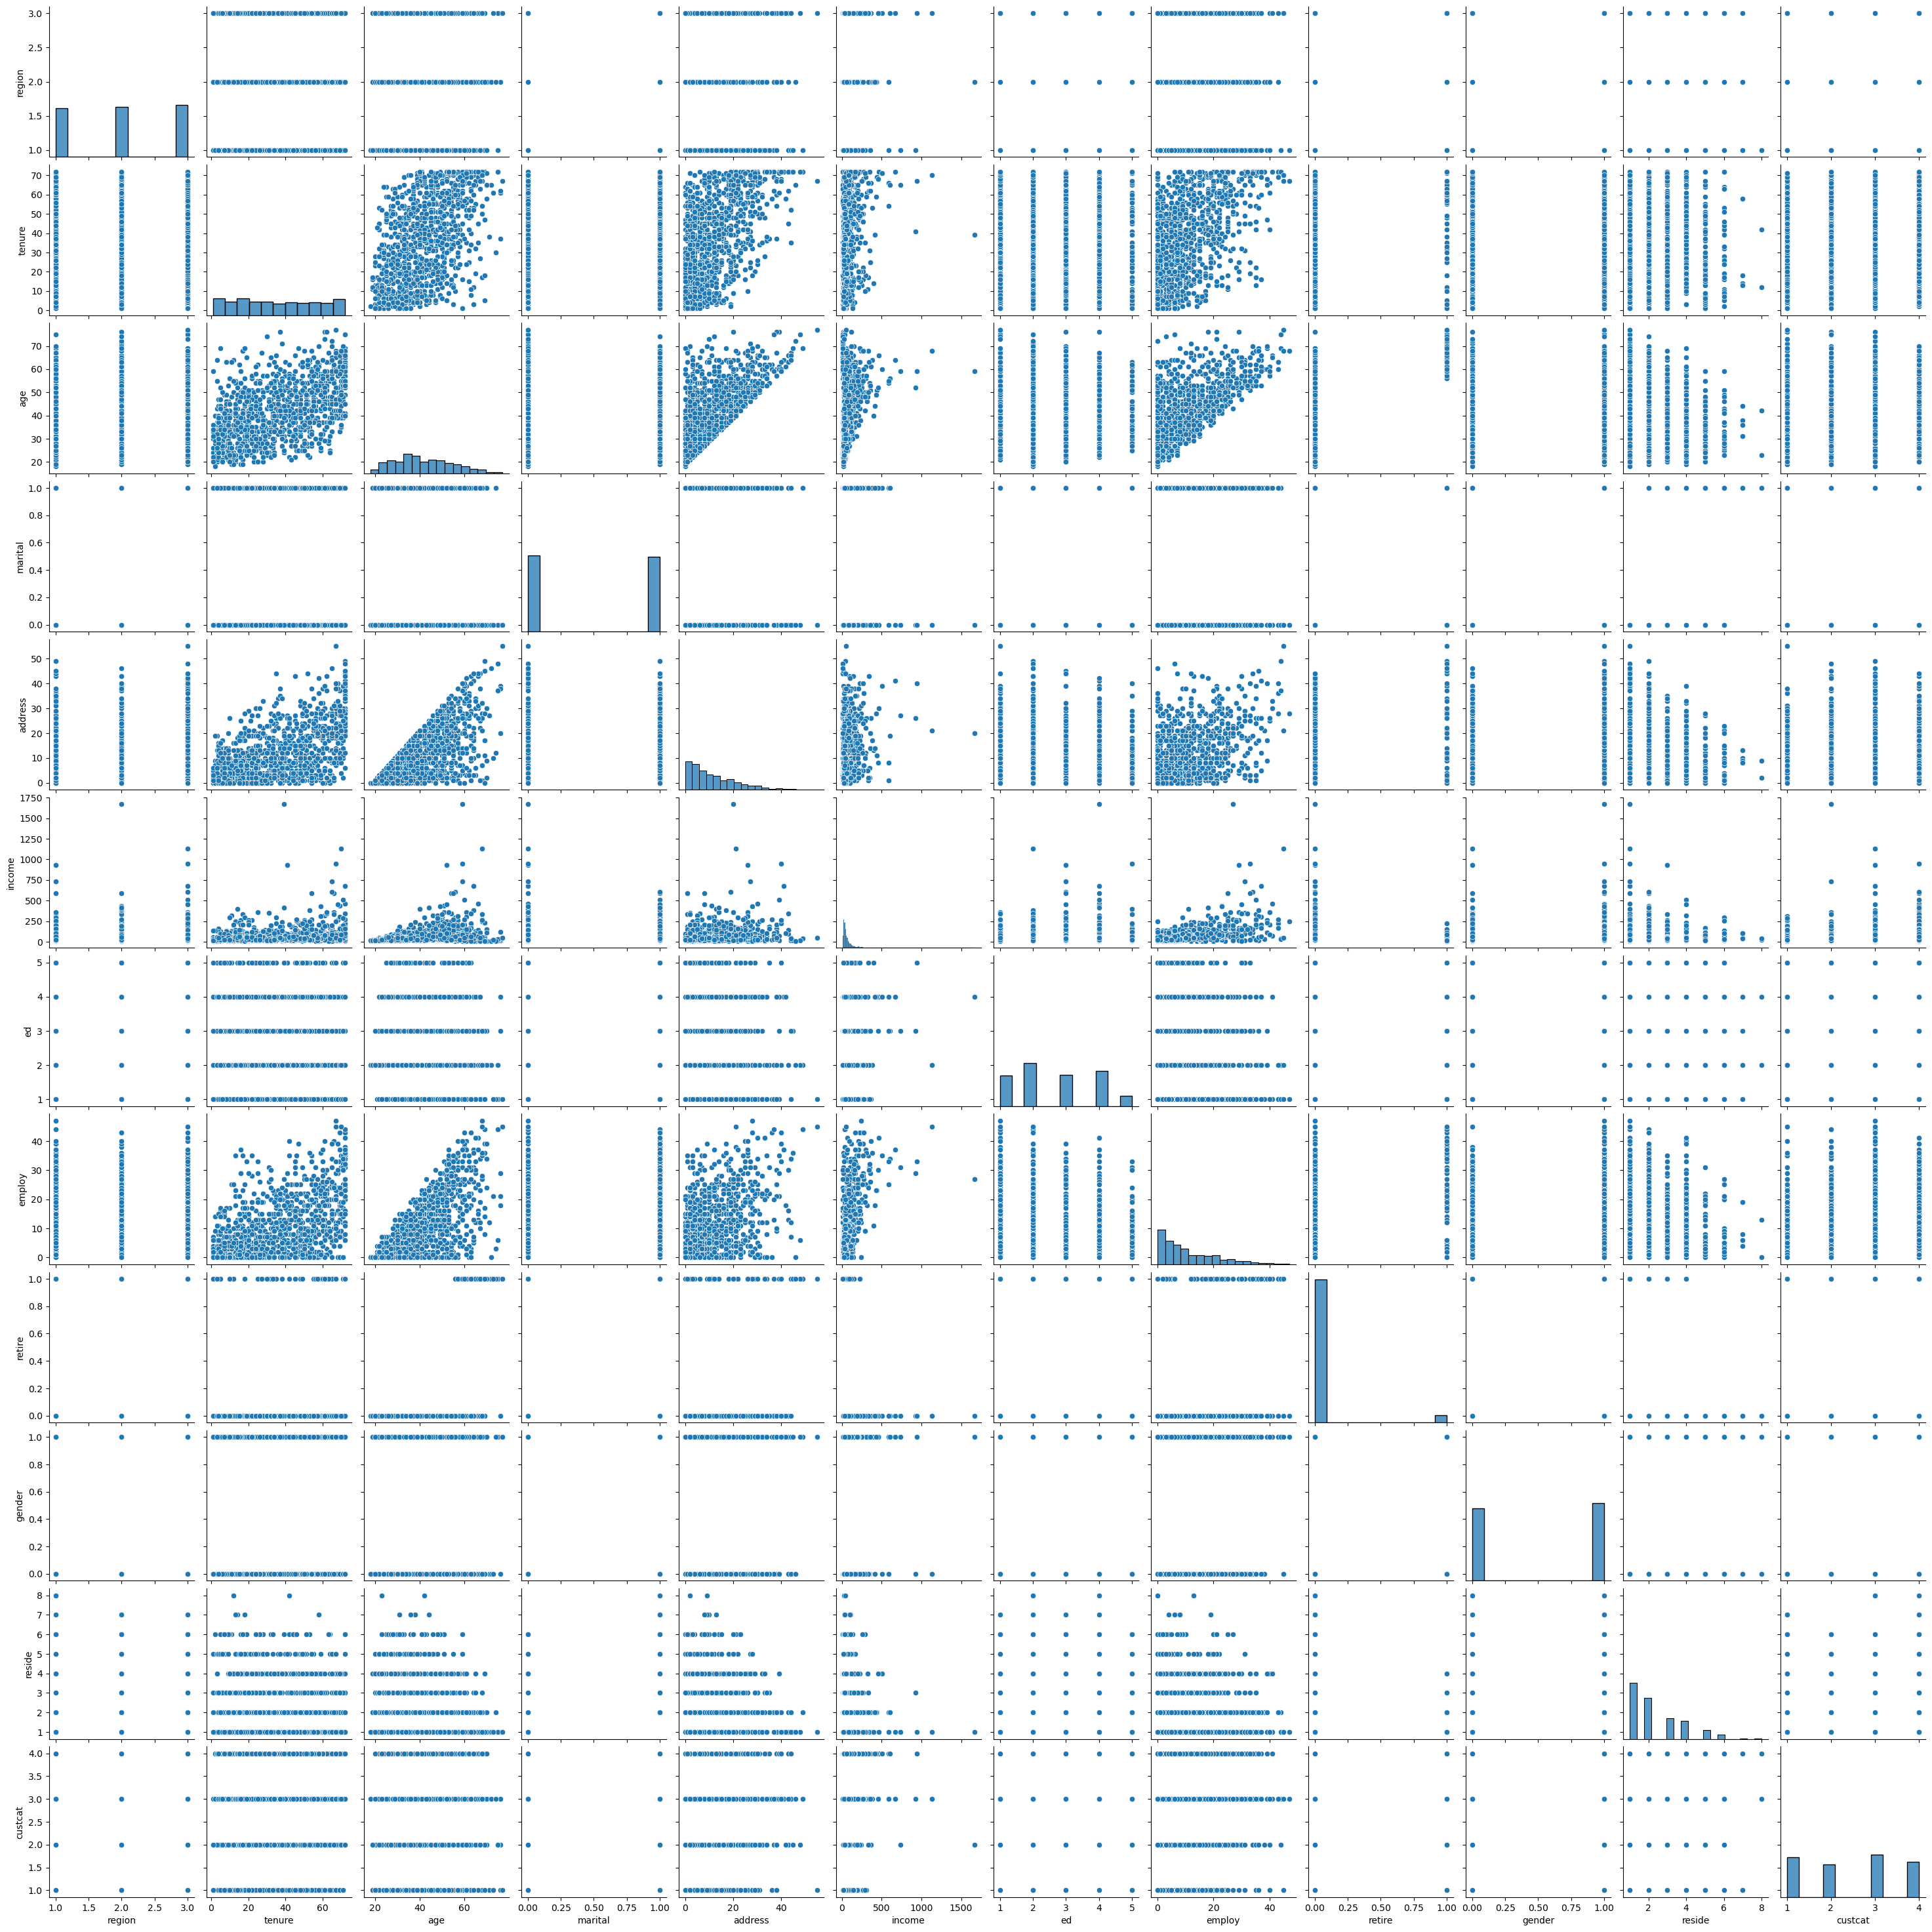

In [41]:
sns.pairplot(df)

In [42]:
px.box(df , x = "income")

# Split dataset 

In [43]:
x = df.drop(columns=["income"])
y = df["income"]

In [44]:
x.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'ed', 'employ',
       'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state=42 )

In [47]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (750, 11)
shape of y_train: (750,)
shape of x_test: (250, 11)
shape of y_test: (250,)


# Import my model

In [48]:
model1 = LinearRegression()

### Fit model1

In [49]:
model1.fit(x_train , y_train)

LinearRegression()

### Predict model1

In [51]:
y_pred = model1.predict(x_test)

### Check mean_squared_error

In [52]:
mean_squared_error(y_test , y_pred)

9337.232660868722

In [53]:
np.sqrt(mean_squared_error(y_test , y_pred))

96.62935713782184

### Check mean_absolute_error

In [54]:
mean_absolute_error(y_test , y_pred)

50.23420895076338

### Check r2_score

In [55]:
r2_score(y_test , y_pred)

0.4548392871145993

In [56]:
df["predicted"] = model1.predict(x)

In [57]:
df

region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  custcat   predicted  
0         0       2        1   64.407982  
1         0       6        4   84.149333  
2         1       2        3  143.449805  
3         1       1        1   10.155751  
4         0       4        3  -11.098294  
..      ...     ...      ...         ...  
995       1       3        1   30.939289  
996       1       1        1   96.288193  
997       1       1        4  267.935091  
998       1       1        3  131.488886  
999       1       3        2   23.931828  

[1000 rows x 13 columns]